In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Problem 1

 𝑘-means clustering algorithm from scratch

In [24]:
df = pd.read_csv('faithful.csv')
print("shape", df.shape)
df.head()

shape (272, 3)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [25]:
#df drop first column
df = df.drop(df.columns[0], axis=1)
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


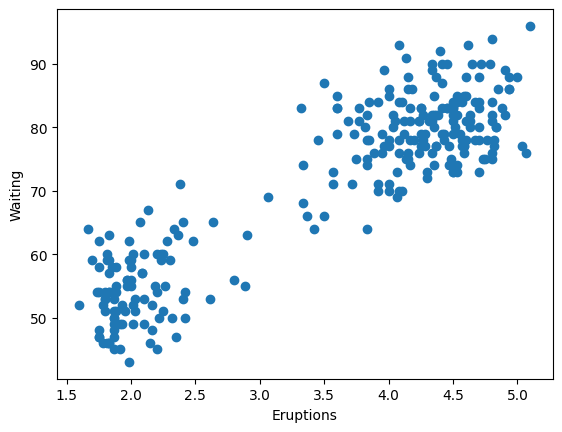

In [26]:
#scatter plot

plt.scatter(df.eruptions, df.waiting)
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.show()

### K-Mean Clustering using Black Box Optimization

[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


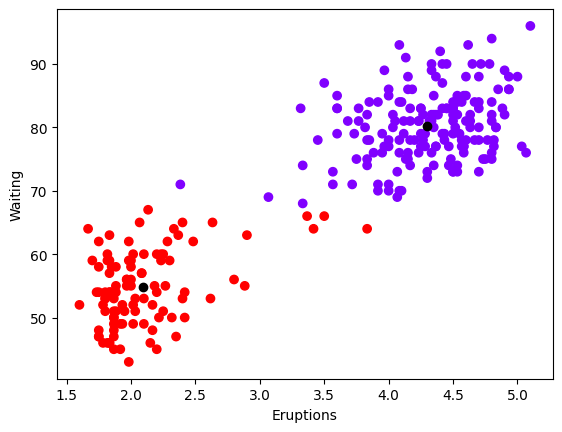

In [27]:
#k-means clustering

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
centroids_blackbox = kmeans.cluster_centers_
print(centroids_blackbox)

#plot
plt.scatter(df.eruptions, df.waiting, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.show()



## K-Means Clustering from Scratch

### K-means Clustering Objective

K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

### Objective Function

The objective of K-means is to find the positions $\mu_1, \mu_2, ..., \mu_k$ of the centers of these clusters and the assignment of each data point to a cluster such that the sum of the squared distances of each point to its closest cluster center is minimized.

The cost function $J$ to be minimized is:

$ J = \sum_{i=1}^{n} \sum_{j=1}^{k} w_{ij} \cdot ||x_i - \mu_j||^2 $

where:

- $n$ is the number of data points,
- $k$ is the number of clusters,
- $x_i$ is the $i^{th}$ data point,
- $\mu_j$ is the centroid of the $j^{th}$ cluster,
- $w_{ij}$ is 1 if $x_i$ is assigned to cluster $j$, and 0 otherwise,
- $||x_i - \mu_j||^2$ is the squared Euclidean distance between $x_i$ and $\mu_j$.

### Algorithm

1. **Initialization**: Randomly select $k$ data points as the initial centroids.
2. **Assignment Step**: Assign each data point to the closest centroid.
3. **Update Step**: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat steps 2 and 3 until the centroids no longer change significantly, indicating convergence.



In [28]:


def k_means(X, k, max_iters=100, tol=1e-4):
    n, features = X.shape
    centroids = X[np.random.choice(n, k, replace=False)]
    prev_centroids = centroids.copy()
    distances = np.zeros((n, k))
    labels = np.zeros(n, dtype=int)
    
    for _ in range(max_iters):
        # Assignment step
        for i in range(k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        labels = np.argmin(distances, axis=1)
        
        # Update step
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)
        
        # Check for convergence
        if np.linalg.norm(centroids - prev_centroids) < tol:
            break
        prev_centroids = centroids.copy()
    
    return labels, centroids





centroids
 [[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]


NameError: name 'centroids' is not defined

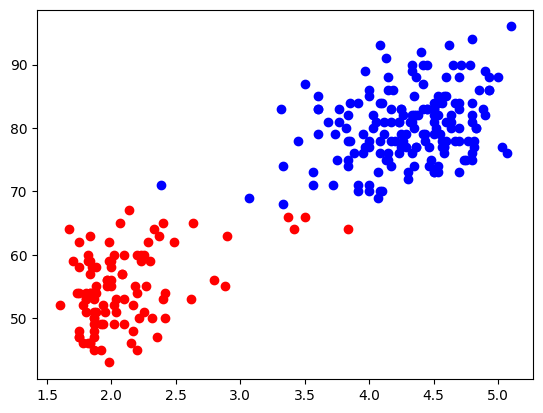

In [29]:
# k=2
X = df.values
labels, centroids_2 = k_means(X, 2)

print("centroids\n", centroids_2)

# Plot the data
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='r', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='b', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', label='Centroids')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()

centroids
 [[ 2.00784848 51.25757576]
 [ 2.6673617  63.93617021]
 [ 4.34461006 81.10691824]]


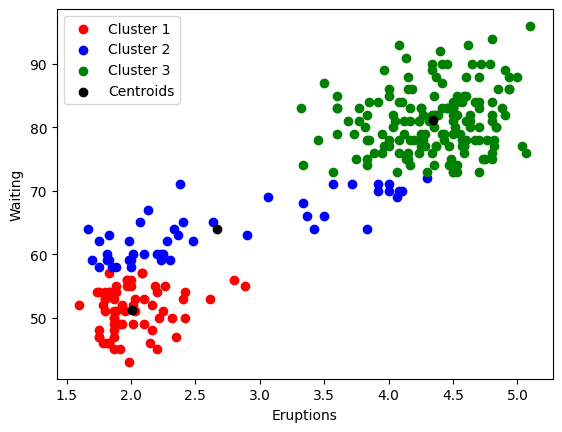

In [32]:
# k=3
X = df.values
labels, centroids_3 = k_means(X, 3)

print("centroids\n", centroids_3)

# Plot the data
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='r', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='b', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], color='g', label='Cluster 3')
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], color='k', label='Centroids')
plt.xlabel('Eruptions')
plt.ylabel('Waiting')
plt.legend()
plt.show()

### Finding optimal K using Elbow Method

The Elbow Method is a heuristic used in determining the number of clusters in a dataset. The method consists of plotting the number of clusters on the x-axis and the WCSS on the y-axis. As the number of clusters increases, the WCSS will tend to decrease; this is because the points will be closer to the centroids they are assigned to.

However, after a certain number of clusters, the decrease in WCSS will start to diminish, forming an "elbow" in the plot. The number of clusters at which this elbow occurs is considered to be the optimal number of clusters. The rationale behind this method is to choose a small value of k that still has a low WCSS, and where increasing k does not provide significantly better modeling of the data.

### WCSS
WCSS stands for Within-Cluster Sum of Square. It is a metric used to evaluate the performance of a K-means clustering algorithm. WCSS measures the sum of squared distances between each point in a cluster and the centroid of that cluster. The idea is to minimize WCSS, which indicates that the clusters are compact and well-separated.

The WCSS for a given number of clusters $k$ is calculated as:

$ \text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $

where:
- $k$ is the number of clusters,
- $C_i$ is the set of points in the $i^{th}$ cluster,
- $x$ is a point in cluster $C_i$,
- $\mu_i$ is the centroid of the $i^{th}$ cluster,
- $||x - \mu_i||^2$ is the squared Euclidean distance between the point $x$ and the centroid $\mu_i$.



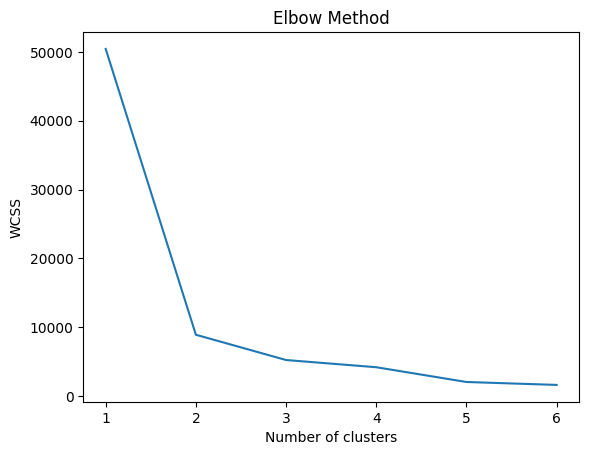

In [33]:
# Elbow method
wcss = []
for i in range(1, 7):
    labels, centroids = k_means(X, i)
    wcss.append(np.sum(np.linalg.norm(X - centroids[labels], axis=1) ** 2))
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the elbow method, the optimal number of clusters are 2. We will use the same for comparing the results of our implementation with the sklearn implementation.

# Problem 2
Obtaining a compressed image using k-means clustering

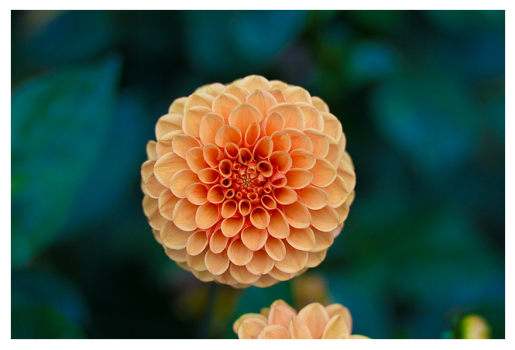

In [53]:
from sklearn.datasets import load_sample_image    # Datasets containing sample images in the scikit-learn library
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg
ax = plt.axes(xticks=[], yticks=[])               # Plot the image
ax.imshow(flower)

In [54]:
flower.shape

(427, 640, 3)

In [55]:
data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image
data.shape

(273280, 3)

In [57]:
# Define a plot_pixels function 

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # Choose a random subset of pixels 

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Define the axes and markets on the figure
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

### Compressing using MiniBatchKMeans from sklearn

Text(0.5, 1.0, '32-color Image')

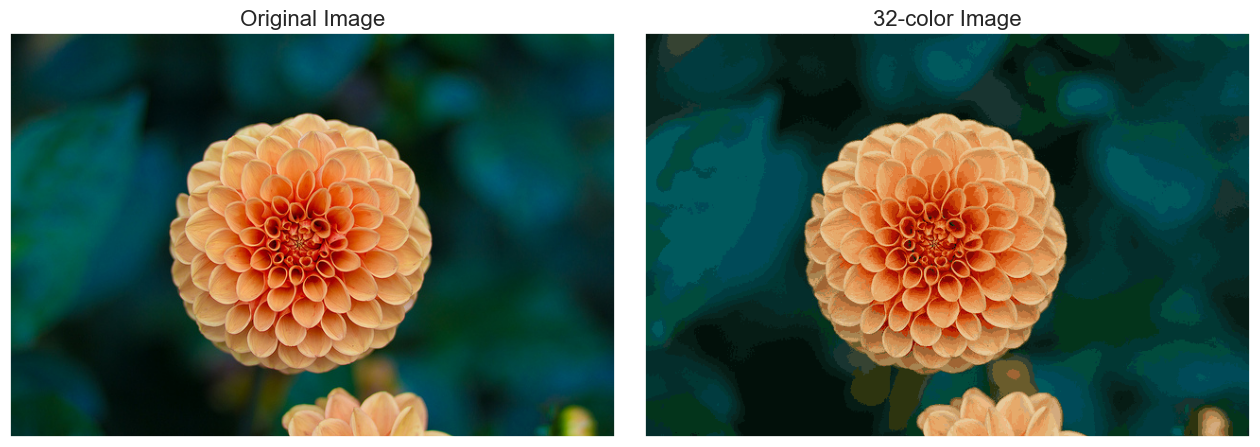

In [73]:
from sklearn.cluster import MiniBatchKMeans

# Perform K-means with K = 32

kmeans = MiniBatchKMeans(32)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

flower_recolored = new_colors.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('32-color Image', size=16)

### Compressing using our implementation

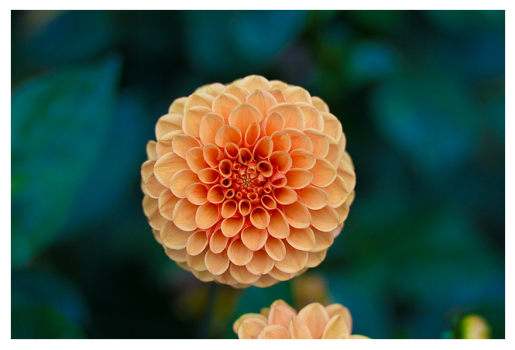

In [60]:
#now doing the same with our defined kmeans function k_means
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg
ax = plt.axes(xticks=[], yticks=[])               # Plot the image
ax.imshow(flower)

In [61]:
data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image
data.shape

(273280, 3)

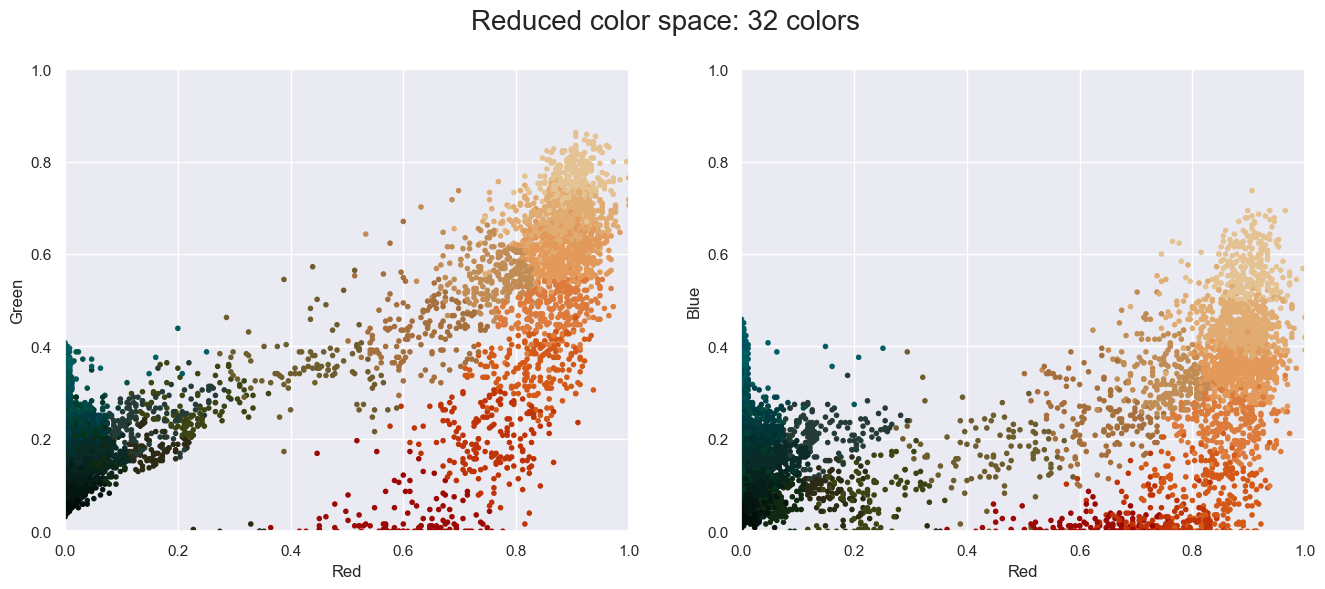

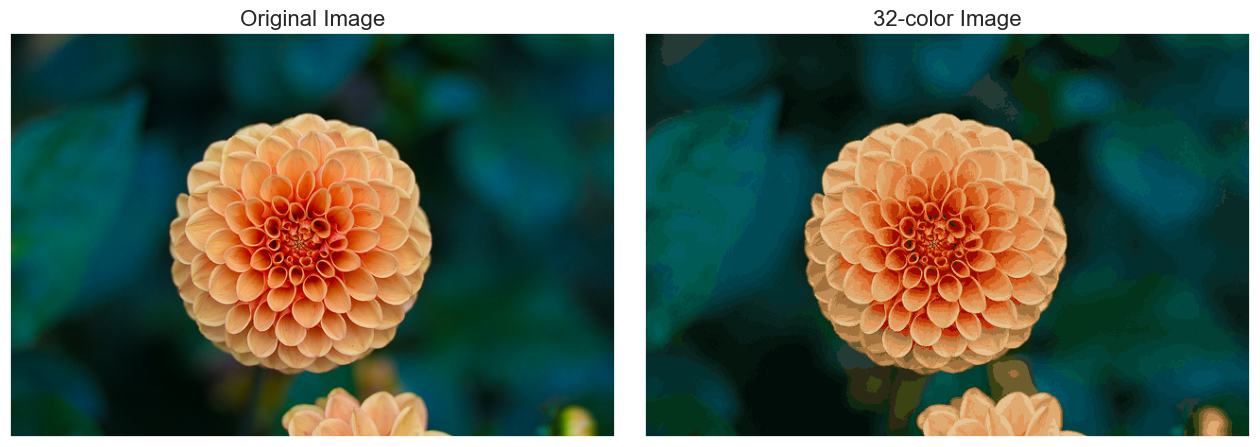

In [74]:
kmeans_scratch = k_means(data, 32)
new_colors_scratch = kmeans_scratch[1][kmeans_scratch[0]]

# Plot the reduced color space using the 32 colors

plot_pixels(data, colors=new_colors_scratch,
            title="Reduced color space: 32 colors")

flower_recolored_scratch = new_colors_scratch.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                          subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored_scratch)
ax[1].set_title('32-color Image', size=16)
plt.show()


### Compressing using kmeans from sklearn

Text(0.5, 1.0, '32-color Image')

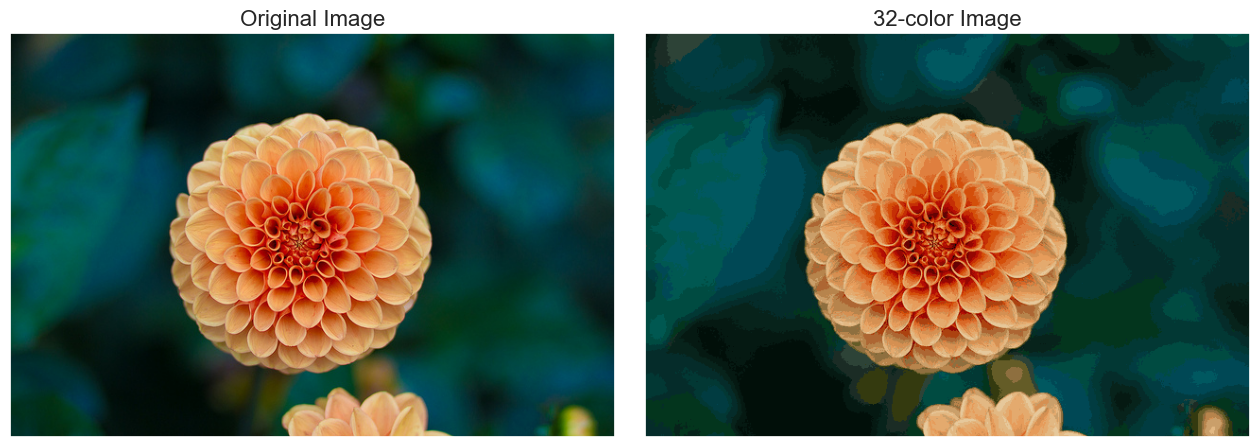

In [72]:
from sklearn.datasets import load_sample_image    # Datasets containing sample images in the scikit-learn library
flower = load_sample_image("flower.jpg")            # Loads a sample image flower.jpg

data = flower / 255.0                # Converts RGB intensity to a [0,1] scale
data = data.reshape(427 * 640, 3)   # Reshapes the image

kmeans_non_minibatch = KMeans(32)
kmeans_non_minibatch.fit(data)
new_colors_non_minibatch = kmeans_non_minibatch.cluster_centers_[kmeans_non_minibatch.predict(data)]


flower_recolored = new_colors.reshape(flower.shape) # Defines the recolored image

# Plots the original image and the recolored image for comparison

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('32-color Image', size=16)

### Timings for each of the above methods

MiniBatchKMeans : 0.5s

My implementation : 22s

KMeans : 7.3s

In my implementation of the KMeans algorithm, I encountered significant timing differences when compressing an image, primarily due to the absence of optimizations present in specialized libraries like scikit-learn. My approach involves iterative calculations of distances and centroid updates using pure Python loops, without the advantage of efficient numerical computations or parallel processing. This method contrasts sharply with MiniBatchKMeans, which accelerates convergence by sampling subsets of the data, and the optimized KMeans, which employs vectorized operations and possibly C extensions to enhance speed. While my code emphasizes simplicity and readability, it does so at the expense of computational efficiency, leading to a longer execution time for tasks such as image compression.




# Implementing GMM Clustering from Scratch

Implementing Gaussian Mixture Model (GMM) clustering from scratch involves understanding the theory behind it, the mathematical equations, cost functions, and algorithms before we dive into coding. Let's break down the process step by step.

## Step 1: Understanding GMM

GMM is a probabilistic clustering method that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. It aims to estimate these parameters in order to find out which distribution a data point belongs to, thus assigning it to a cluster.

## Step 2: Mathematical Equations

The key equations involve:

1. **Gaussian Distribution (Normal Distribution):**
   $$p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)$$
   where $x$ is the data point, $\mu$ is the mean, $\Sigma$ is the covariance matrix, and $d$ is the dimensionality of the data.

2. **Mixture Model:**
   The probability of a data point $x$ given the mixture model is:
   $$p(x|\theta) = \sum_{k=1}^K \pi_k p(x|\mu_k, \Sigma_k)$$
   where $\theta$ represents the parameters of the mixture model, $K$ is the number of Gaussian distributions in the mixture, $\pi_k$ is the mixing coefficient for cluster $k$ (with $\sum_{k=1}^K \pi_k = 1$), and $p(x|\mu_k, \Sigma_k)$ is the probability density of $x$ under the $k$-th Gaussian distribution.

## Step 3: Cost Function and Optimization

The goal is to maximize the likelihood of the data given the parameters, or equivalently, minimize the negative log-likelihood. The cost function (negative log-likelihood) is:
$$\mathcal{L}(\theta) = -\sum_{i=1}^N \log\left(\sum_{k=1}^K \pi_k p(x_i|\mu_k, \Sigma_k)\right)$$
where $N$ is the number of data points.

## Step 4: Expectation-Maximization (EM) Algorithm

To find the parameters that minimize the cost function, we use the EM algorithm, which iterates between the following two steps:

1. **Expectation (E) step:** Calculate the responsibility $\gamma(z_{ik})$ that cluster $k$ takes for data point $i$:
   $$\gamma(z_{ik}) = \frac{\pi_k p(x_i|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j p(x_i|\mu_j, \Sigma_j)}$$

2. **Maximization (M) step:** Update the parameters $\pi$, $\mu$, and $\Sigma$ based on the responsibilities:
   - $$\mu_k^{new} = \frac{\sum_{i=1}^N \gamma(z_{ik}) x_i}{\sum_{i=1}^N \gamma(z_{ik})}$$
   - $$\Sigma_k^{new} = \frac{\sum_{i=1}^N \gamma(z_{ik}) (x_i - \mu_k^{new})(x_i - \mu_k^{new})^T}{\sum_{i=1}^N \gamma(z_{ik})}$$
   - $$\pi_k^{new} = \frac{\sum_{i=1}^N \gamma(z_{ik})}{N}$$

## Pseudo Code

```plaintext
1. Initialize K Gaussian distributions with parameters (π, μ, Σ)
2. Repeat until convergence:
   a. E-step: For each data point, calculate responsibilities for each cluster
   b. M-step: Update the parameters (π, μ, Σ) for each cluster based on the responsibilities
3. Assign each data point to the cluster with the highest responsibility


In [5]:
# Read in the data 
data = pd.read_csv('clustering_gmm.csv')

# Inspect the head of the data to confirm data has been imported correctly

data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


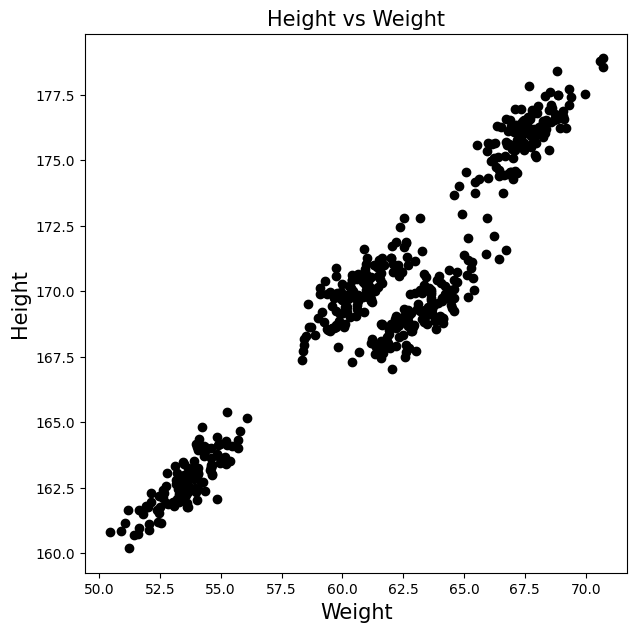

In [6]:
# Generates a scatter plot of the data

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"], c = 'black')
plt.xlabel('Weight', fontsize = 15)
plt.ylabel('Height', fontsize = 15)
plt.title('Height vs Weight', fontsize = 15)
plt.show()

/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_26671/882226237.py:71: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["Weight"],data["Height"],cmap = 'viridis')


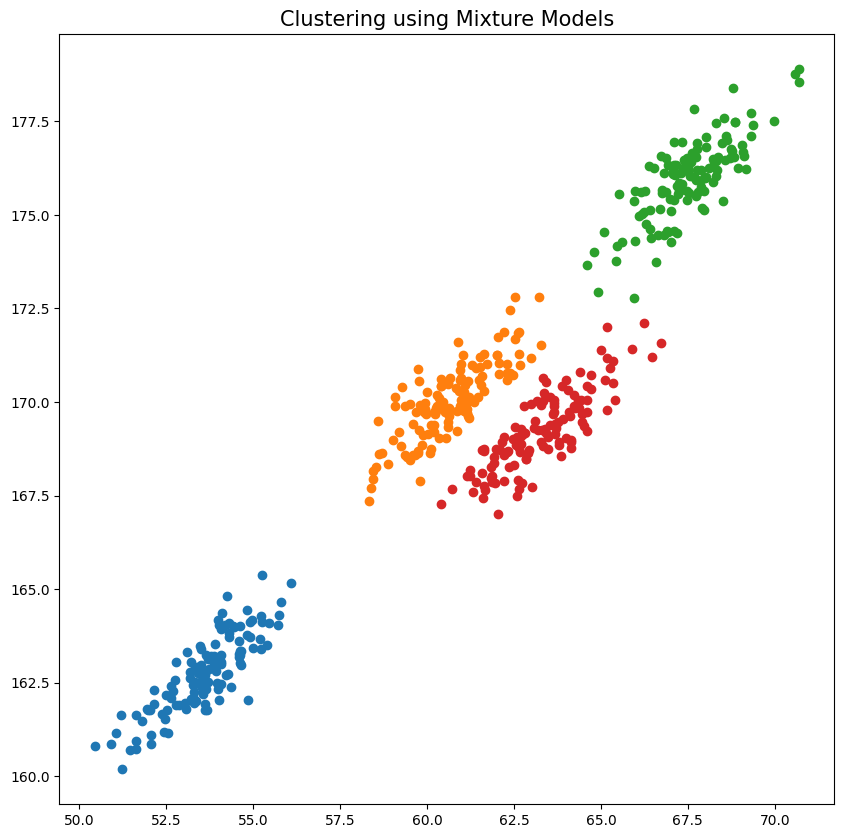

In [7]:
data = pd.read_csv('clustering_gmm.csv')

import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, n_components=2, tol=1e-4, max_iter=100):
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.means = None
        self.covariances = None
        self.mixing_coeffs = None
        self.responsibilities = None
    
    def initialize_parameters(self, X):
        np.random.seed(0)  # For reproducibility
        random_indices = np.random.choice(X.shape[0], self.n_components, replace=False)
        self.means = X[random_indices]
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_components)])
        self.mixing_coeffs = np.ones(self.n_components) / self.n_components
    
    def e_step(self, X):
        self.responsibilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            rv = multivariate_normal(self.means[k], self.covariances[k])
            self.responsibilities[:, k] = self.mixing_coeffs[k] * rv.pdf(X)
        self.responsibilities = self.responsibilities / self.responsibilities.sum(axis=1)[:, np.newaxis]
    
    def m_step(self, X):
        Nk = self.responsibilities.sum(axis=0)
        
        for k in range(self.n_components):
            self.means[k] = (1 / Nk[k]) * np.dot(self.responsibilities[:, k], X)
            x_minus_mean = X - self.means[k]
            self.covariances[k] = (1 / Nk[k]) * np.dot(self.responsibilities[:, k] * x_minus_mean.T, x_minus_mean)
            self.mixing_coeffs[k] = Nk[k] / X.shape[0]
    
    def fit(self, X):
        self.initialize_parameters(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
            # Check for convergence (this could be more sophisticated)
            if iteration > 0 and np.linalg.norm(self.means - old_means) < self.tol:
                break
            old_means = self.means.copy()
    
    def predict(self, X):
        self.e_step(X)  # Recalculate responsibilities on the fitted data
        return np.argmax(self.responsibilities, axis=1)

# Convert the data to a NumPy array
X = data.to_numpy()

# Create and fit the GMM
gmm = GMM(n_components=4)
gmm.fit(X)


labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

plt.figure(figsize=(10,10))
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],cmap = 'viridis')
plt.title('Clustering using Mixture Models', fontsize = 15)
plt.show()


In [8]:
#cluster centroids
print("means\n", gmm.means)

means
 [[ 53.60032218 162.76480188]
 [ 60.65950668 170.03409098]
 [ 67.50968554 175.97048706]
 [ 63.29309423 169.26166077]]


### Now Calculating the centroid using sklearn and comparing the results with our implementation
```

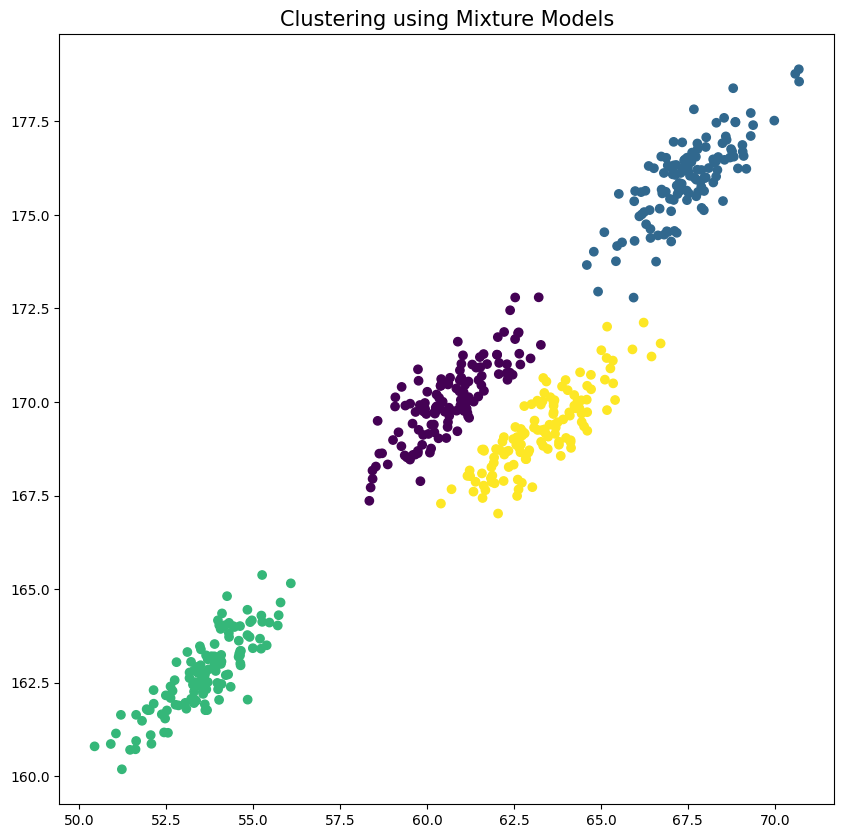

In [21]:
# Import the mixture model, GaussianMixture and training it on the data
data = pd.read_csv('clustering_gmm.csv')
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

# Store the predictions of the mixture model

labels = gmm.predict(data)
data['cluster'] = labels
data.head()

# Visualize the clusters

plt.figure(figsize=(10,10))
plt.scatter(data["Weight"],data["Height"],cmap = 'viridis', c = data['cluster'])
plt.title('Clustering using Mixture Models', fontsize = 15)
plt.show()

In [22]:
#centroids
print("means\n", gmm.means_)

means
 [[ 60.65944689 170.03409967]
 [ 67.51014715 175.97136573]
 [ 53.60032216 162.76480188]
 [ 63.29374518 169.26263398]]


### Comparing the results of our implementation with the sklearn implementation

#### Centroids from our implementation :

| Centroid Index | Coordinate 1 | Coordinate 2 |
|----------------|--------------|--------------|
| 1              | 53.60032218  | 162.76480188 |
| 2              | 60.65950668  | 170.03409098 |
| 3              | 67.50968554  | 175.97048706 |
| 4              | 63.29309423  | 169.26166077 |

 


#### Centroids from sklearn :


| Centroid Index | Coordinate 1 | Coordinate 2 |
|----------------|--------------|--------------|
| 1              | 53.60032216  | 162.76480188 |
| 2              | 60.65944689  | 170.03409967 |
| 3              | 67.51014715  | 175.97136573 |
| 4              | 63.29374518  | 169.26263398 |

### Conclusion

The centroids obtained from our implementation are very close to the centroids obtained from the sklearn implementation. This indicates that our implementation is correct and is able to produce results similar to the sklearn implementation.